# Estatística (Mestrado)

Base de dados utilizado: https://dados.gov.br/dados/conjuntos-dados/crimes-violentos

## Atividade 1

Montar tabela de distribuição de frequência em python

In [1]:
# !wget https://dados.mg.gov.br/dataset/87e4675b-bb0a-444a-ba0f-1463b893d01a/resource/bd02f7db-04cc-4149-98ee-e6fb2e713b04/download/crimes_violentos_2024.csv

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('crimes_violentos_2024.csv', sep=';')

In [4]:
df

,registros,natureza,municipio,cod_municipio,mes,ano,risp,rmbh
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2024,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2024,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2024,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2024,12,NÃO
4,1,Estupro Consumado,ACUCENA,310050,1,2024,12,NÃO
...,...,...,...,...,...,...,...,...
133063,0,Homicídio Consumado (Registros),VIRGOLANDIA,317190,12,2024,8,NÃO
133064,0,Homicídio Consumado (Registros),VISCONDE DO RIO BRANCO,317200,12,2024,4,NÃO
133065,0,Homicídio Consumado (Registros),VOLTA GRANDE,317210,12,2024,4,NÃO
133066,0,Homicídio Consumado (Registros),WENCESLAU BRAZ,317220,12,2024,17,NÃO


Obs: Para o exercicio 1 eu restringi a minha análise para o municipio de Belo Horizonte com crimes de Homicídio Consumado (Registros) para eu poder replicar no caderno para exercitar fazendo as contas e passos no caderno.

In [5]:
# Exercicio 1: Tabela de distribuição de frequencia

# Base de dados
df_bh = df[df['municipio'].str.upper() == 'BELO HORIZONTE']
df_bh_homicidio = df_bh[df_bh['natureza'] == 'Homicídio Consumado (Registros)']

df_dados = df_bh_homicidio['registros']
df_dados.sort_values()

123684    17
124537    26
129655    26
130508    26
126243    27
125390    28
127949    28
131361    28
132214    29
128802    30
133067    31
127096    34
Name: registros, dtype: int64

In [6]:
# Deixar em rol/ordenar
df_dados_rol = df_dados.sort_values()
menor_valor = df_dados_rol.iloc[0]
maior_valor = df_dados_rol.iloc[-1]

# Obter a amplitude total
amplitude_total = maior_valor - menor_valor

# Quantidade de classes (Sturges)
k = int(1 + 3.322 * np.log10(len(df_dados_rol)))

# Amplitude de cada classe
h = amplitude_total / k

print(f'amplitude total={amplitude_total} k={k} h={h}')

# Passo 1: criar os limites das classes
limites_classes = [menor_valor + i * h for i in range(k + 1)]

# Passo 2: calcular frequências
frequencias, _ = np.histogram(df_dados_rol, bins=limites_classes)

# Passo 3: calcular ponto médio de cada classe
classes = []
pontos_medios = []
for i in range(k):
    inferior = limites_classes[i]
    superior = limites_classes[i + 1]
    classes.append(f"{inferior:.2f} ⊢ {superior:.2f}")
    pontos_medios.append((inferior + superior) / 2)

# Frequência acumulada
frequencia_acumulada = np.cumsum(frequencias)

# Criar o DataFrame com a tabela
tabela_frequencia = pd.DataFrame({
    'Classe': classes,
    'Frequência (fi)': frequencias,
    'Pontos Médios (xi)': pontos_medios,
    'Frequência Acumulada (Fi)': frequencia_acumulada
})

# Exibir a tabela
print("\n Tabela de Distribuição de Frequência\n")
print(tabela_frequencia)

# Somatório de fi
print(f"\nSomatório de fi: {tabela_frequencia['Frequência (fi)'].sum()}")

amplitude total=17 k=4 h=4.25

 Tabela de Distribuição de Frequência

          Classe  Frequência (fi)  Pontos Médios (xi)  \
0  17.00 ⊢ 21.25                1              19.125   
1  21.25 ⊢ 25.50                0              23.375   
2  25.50 ⊢ 29.75                8              27.625   
3  29.75 ⊢ 34.00                3              31.875   

   Frequência Acumulada (Fi)  
0                          1  
1                          1  
2                          9  
3                         12  

Somatório de fi: 12


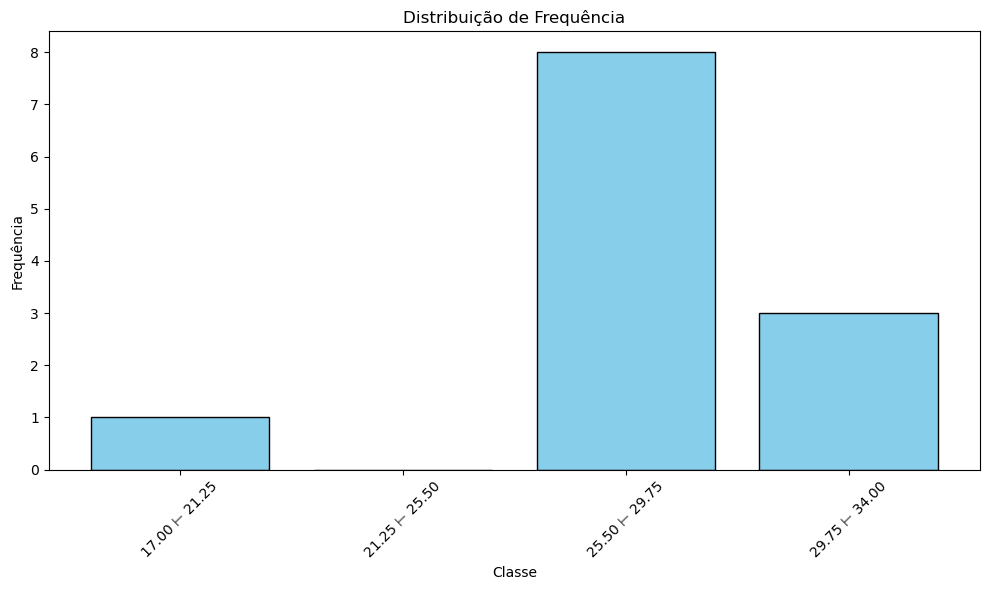

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(tabela_frequencia["Classe"], tabela_frequencia["Frequência (fi)"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.title("Distribuição de Frequência")
plt.tight_layout()
plt.show()


In [8]:
df

,registros,natureza,municipio,cod_municipio,mes,ano,risp,rmbh
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2024,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2024,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2024,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2024,12,NÃO
4,1,Estupro Consumado,ACUCENA,310050,1,2024,12,NÃO
...,...,...,...,...,...,...,...,...
133063,0,Homicídio Consumado (Registros),VIRGOLANDIA,317190,12,2024,8,NÃO
133064,0,Homicídio Consumado (Registros),VISCONDE DO RIO BRANCO,317200,12,2024,4,NÃO
133065,0,Homicídio Consumado (Registros),VOLTA GRANDE,317210,12,2024,4,NÃO
133066,0,Homicídio Consumado (Registros),WENCESLAU BRAZ,317220,12,2024,17,NÃO



## Atividade 2

`Visualização dos dados em graficos`

Para cada uma das variáveis da base, plote os gráficos a seguir **e apresente o que se pode deduzir a partir de cada um dos gráficos**:

- a. Gráfico em linha
- b. Gráfico de área
- c. Gráfico de barras
- d. Histograma
- e. Gráfico de dispersão
- f. Gráfico de caixa
- g. Gráfico de pizza


Informações da base de dados:

- Registros: Quantidade de ocorrências registradas.
- Natureza: Natureza do crime cometido.
- Municipio: Nome do município em que ocorreu o crime.
- Código Município: Código do município.
- Mês: Mês em que ocorreu o fato.
- Ano: Ano em que ocorreu o fato.
- RISP: Número de identificação da Região Integrada de Segurança Pública.
- RMBH: Se pertence ou não à Região Metropolitana de Belo Horizonte.

### Gráfico em linha

<Axes: xlabel='Classe', ylabel='Frequência (fi)'>

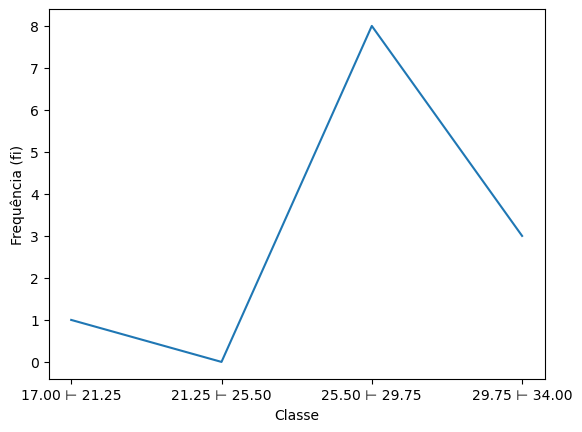

In [9]:
# Grafico em linha
sns.lineplot(x="Classe", y="Frequência (fi)",
             data=tabela_frequencia)


### Gráfico de Área

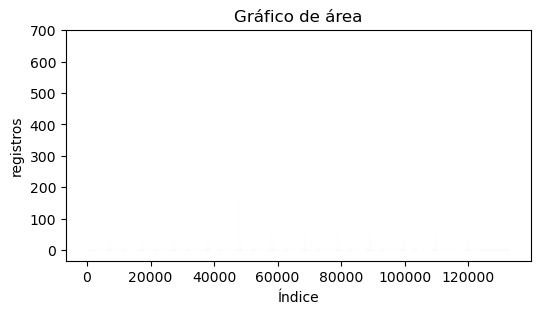

In [10]:
plt.figure(figsize=(6, 3))
plt.fill_between(df.index, df['registros'], alpha=0.5)
plt.title(f'Gráfico de área')
plt.xlabel('Índice')
plt.ylabel('registros')
plt.show()

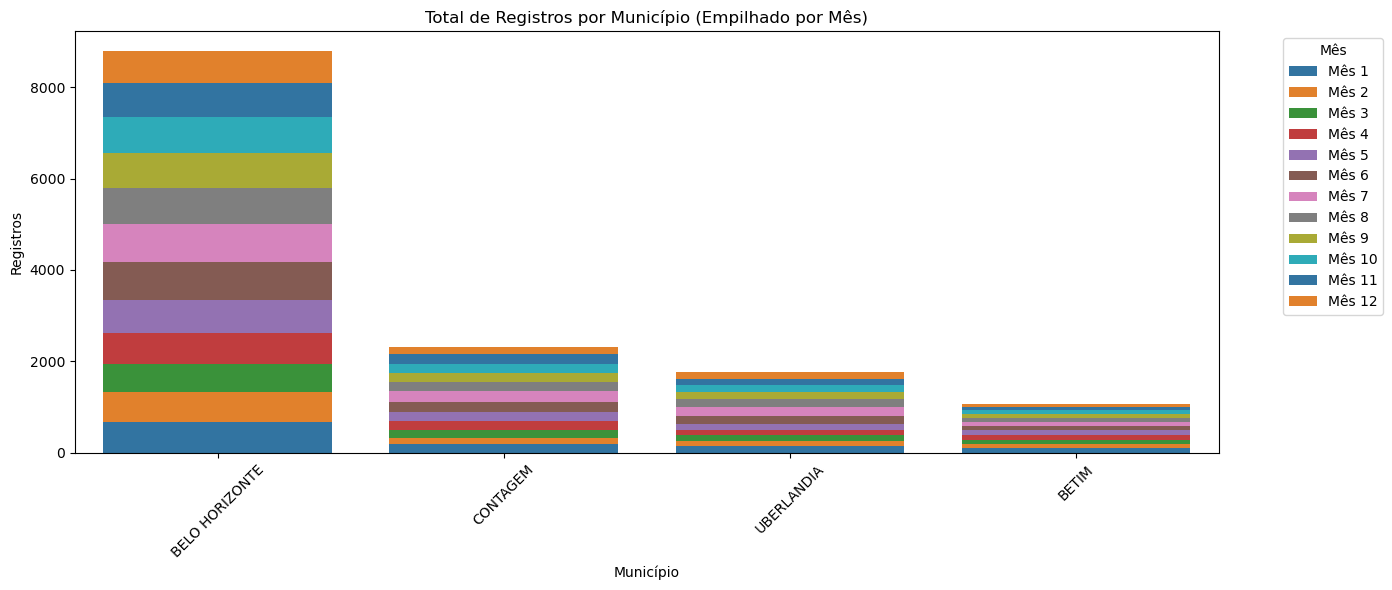

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupa os dados por município e mês
df_grouped = df.groupby(['municipio', 'mes'], as_index=False)['registros'].sum()

# Seleciona os 10 municípios com mais registros
municipios_top = (
    df_grouped.groupby('municipio')['registros']
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index
)

# Filtra os dados
df_top = df_grouped[df_grouped['municipio'].isin(municipios_top)]

# Reorganiza os dados em formato de pivot (para empilhamento manual)
df_pivot = df_top.pivot(index='municipio', columns='mes', values='registros').fillna(0)

# Ordena os municípios pela soma total
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).sort_values(ascending=False).index]

# Cores para os meses
palette = sns.color_palette("tab10", n_colors=12)

# Plot
plt.figure(figsize=(14, 6))
bottom = None
for i, mes in enumerate(sorted(df_pivot.columns)):
    sns.barplot(
        x=df_pivot.index,
        y=df_pivot[mes],
        bottom=bottom,
        color=palette[i],
        label=f'Mês {mes}'
    )
    bottom = df_pivot.iloc[:, :i+1].sum(axis=1)

plt.title('Total de Registros por Município (Empilhado por Mês)')
plt.ylabel('Registros')
plt.xlabel('Município')
plt.xticks(rotation=45)
plt.legend(title='Mês', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Histograma

<Axes: xlabel='registros', ylabel='Count'>

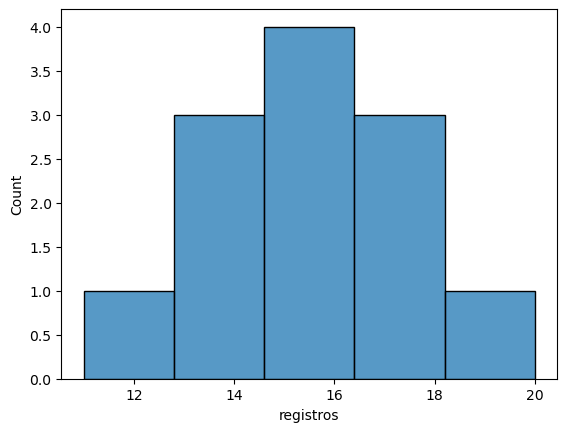

In [12]:
df_bh_estrupo = df_bh[df_bh['natureza'] == 'Estupro Consumado']

sns.histplot(
    df_bh_estrupo,
    x="registros"
)

### Gráfico de caixa

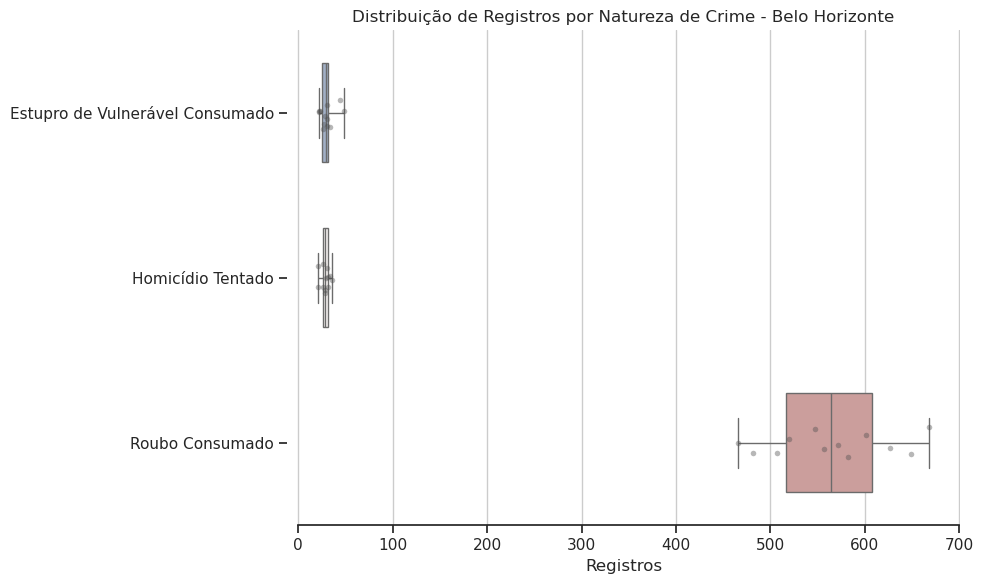

In [13]:
# 2. Soma total de registros por natureza
naturezas_top = (
    df_bh.groupby('natureza')['registros']
    .sum()
    .sort_values(ascending=False)
    .head(3)  # Top 5 naturezas, por exemplo
    .index
)

# 3. Filtra df_bh para manter apenas essas naturezas
df_bh_top = df_bh[df_bh['natureza'].isin(naturezas_top)]

# 4. Criação do gráfico
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_bh_top, x="registros", y="natureza", hue="natureza",
    whis=[0, 100], width=0.6, palette="vlag"
)

# 5. Adiciona os pontos individuais
sns.stripplot(
    data=df_bh_top, x="registros", y="natureza", 
    size=4, color=".3", alpha=0.4, jitter=True
)

# 6. Ajustes finais
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel="Registros", title="Distribuição de Registros por Natureza de Crime - Belo Horizonte")
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()